# a.

* The dataset is the daily COVID-19 test across countries on a rolling 7-day average basis from Mar 3rd, 2020 to Mar 7th, 2022.

* The dataset includes 84720 rows and the dataset is grouped by entity and country code.
* URL:https://ourworldindata.org/search?q=covid+
* Two interesting question: 
* How many covid-19 tests in total are performed by each country?
* How many covid-19 tests in total are performed in each day?


In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## b.  load the data  into a pandas dataframe

In [83]:
df=pd.read_csv('covidstat.csv')
df

,Entity,Code,Day,new_tests_7day_smoothed,142752-annotations
0,Albania,ALB,2020-03-03,4,tests performed
1,Albania,ALB,2020-03-04,4,tests performed
2,Albania,ALB,2020-03-05,5,tests performed
3,Albania,ALB,2020-03-06,5,tests performed
4,Albania,ALB,2020-03-07,5,tests performed
...,...,...,...,...,...
84714,Zimbabwe,ZWE,2022-03-03,3940,tests performed
84715,Zimbabwe,ZWE,2022-03-04,4053,tests performed
84716,Zimbabwe,ZWE,2022-03-05,4694,tests performed
84717,Zimbabwe,ZWE,2022-03-06,3719,tests performed


## c. use pd.describe() to get a rough overview of the data

In [16]:
df.describe()

,new_tests_7day_smoothed
count,8.471900e+04
mean,6.087650e+04
std,1.933707e+05
min,0.000000e+00
25%,2.140000e+03
50%,8.640000e+03
75%,3.594550e+04
max,3.080396e+06


## d.

## print the array of columns and the index array

In [18]:
print(df.columns)
print(df.index)
print(list(df.columns))

Index(['Entity', 'Code', 'Day', 'new_tests_7day_smoothed',
       '142752-annotations'],
      dtype='object')
RangeIndex(start=0, stop=84719, step=1)
['Entity', 'Code', 'Day', 'new_tests_7day_smoothed', '142752-annotations']


## create some simple plot of part of the data

In [56]:
dates=df['Day'].unique()

In [45]:
dfUSA = df[df['Code']=='USA'] 
dfRUS = df[df['Code']=='RUS']  
dfCAN = df[df['Code']=='CAN'] 

Text(0.5, 1.0, 'Test data of recent 50 days from United States, Russia and Canada')

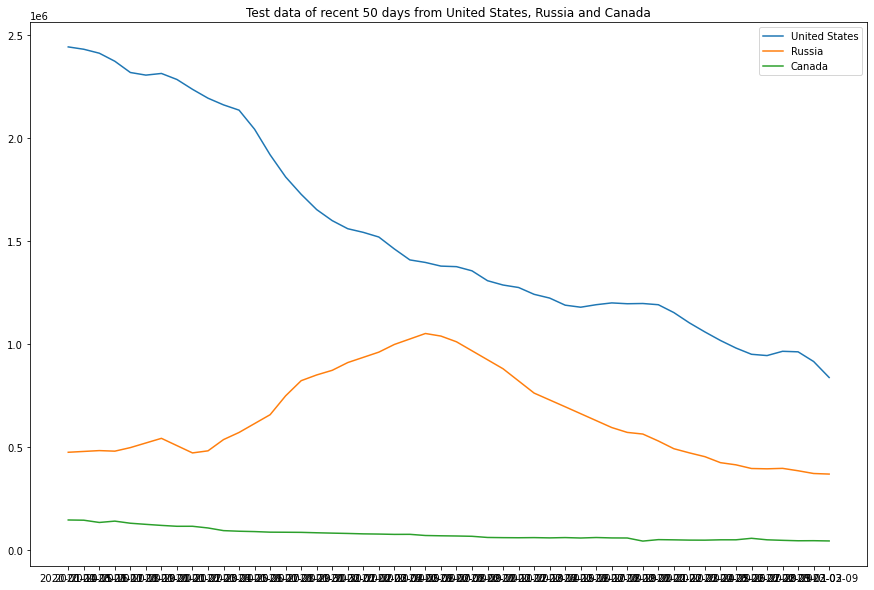

In [47]:
plt.figure(figsize=(15,10))
plt.plot(dates[-50:],dfUSA['new_tests_7day_smoothed'][-50:],label="United States")
plt.plot(dates[-50:],dfRUS['new_tests_7day_smoothed'][-50:],label="Russia")
plt.plot(dates[-50:],dfCAN['new_tests_7day_smoothed'][-50:],label="Canada")
plt.legend()
plt.xlabel('Dates')
plt.ylabel('')
plt.title('Test data of recent 50 days from United States, Russia and Canada')

## create a pivot table and plot some data from that pivot table

In [58]:
dfpt=pd.pivot_table(df,values="new_tests_7day_smoothed",index="Day",columns="Entity")
dfpt

Entity,Albania,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Zimbabwe
Day,,,,,,,,,,,,,,,,,,,,,
2020-01-08,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-11,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-05,355.0,NaN,1733.0,NaN,26514.0,3509.0,80643.0,535596.0,8079.0,356.0,...,391366.0,2584.0,NaN,413782.0,648095.0,NaN,8923.0,141050.0,2991.0,4694.0
2022-03-06,388.0,NaN,1862.0,NaN,NaN,3480.0,80531.0,530624.0,7459.0,NaN,...,384778.0,2182.0,NaN,406179.0,652733.0,NaN,8656.0,149429.0,NaN,3719.0
2022-03-07,489.0,NaN,1876.0,NaN,NaN,NaN,81481.0,533485.0,7204.0,NaN,...,379242.0,3211.0,NaN,389573.0,NaN,NaN,NaN,161553.0,NaN,3537.0


Text(0, 0.5, 'Tests Number')

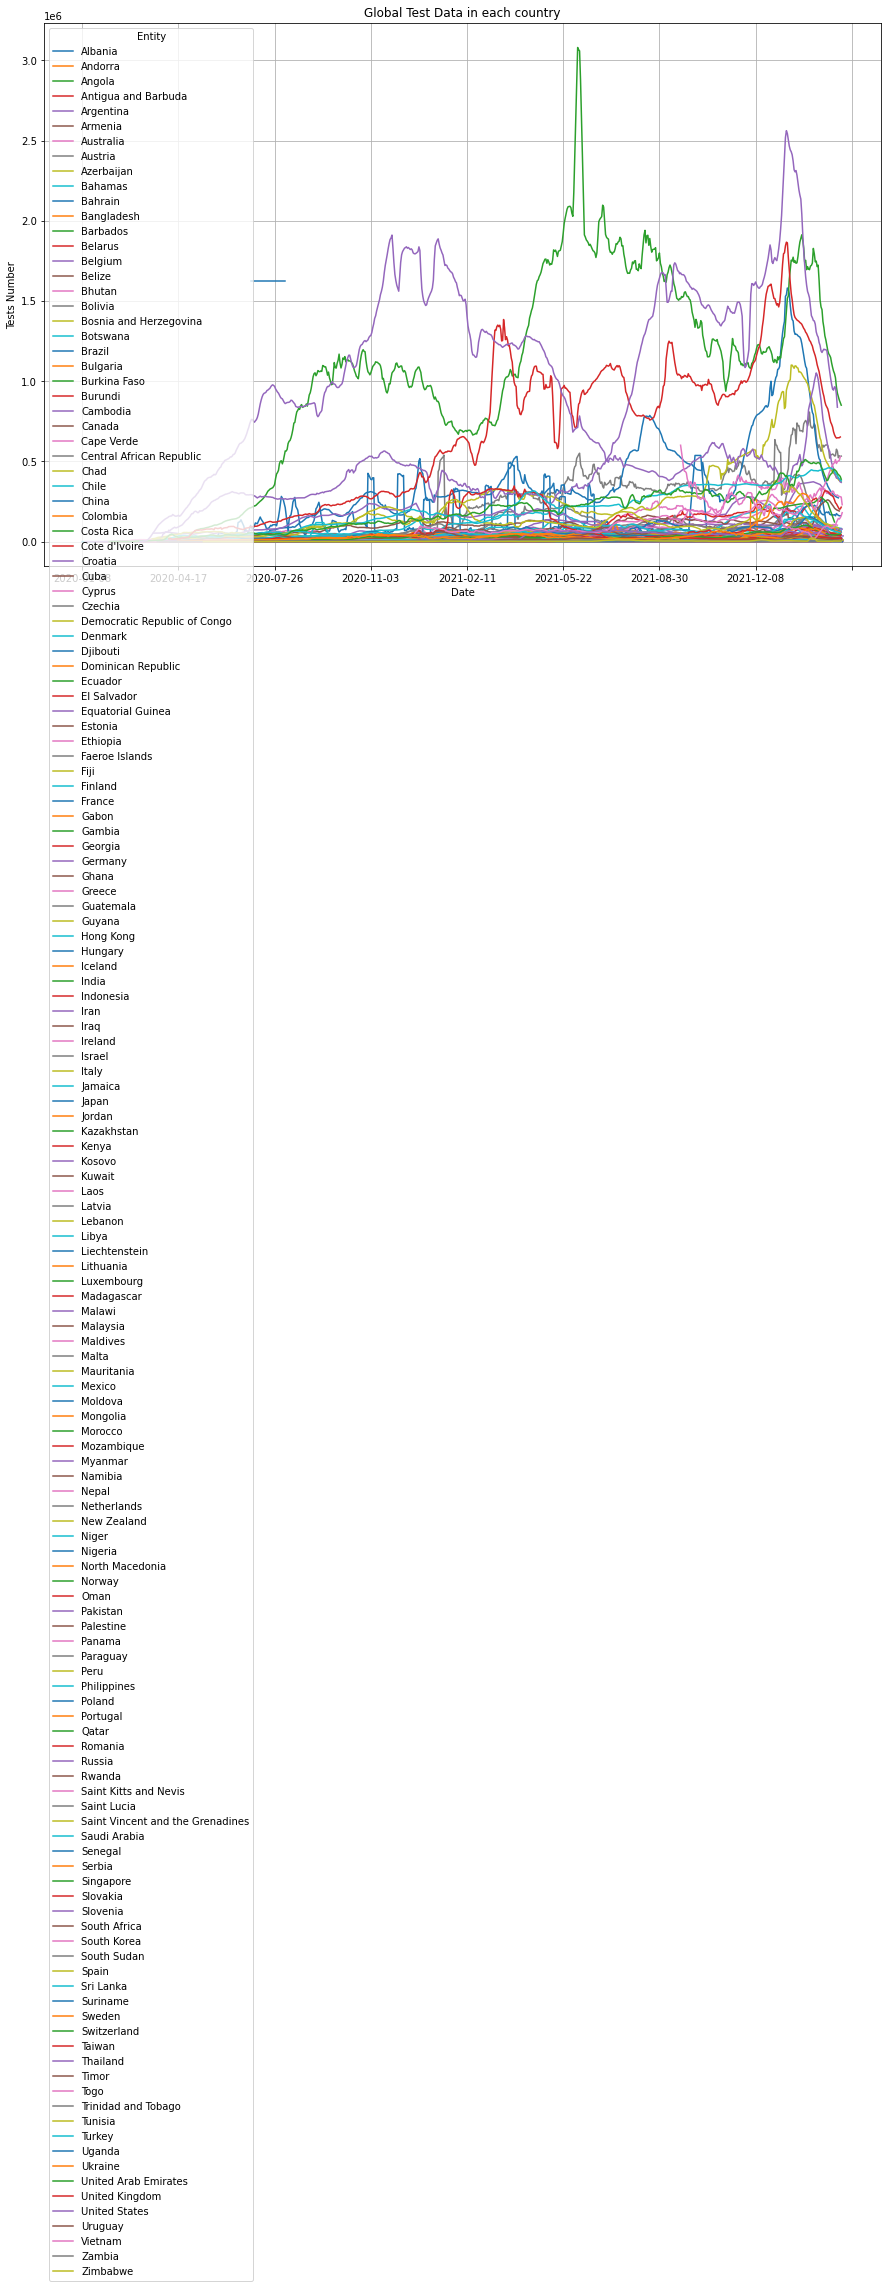

In [62]:
dfpt.plot(figsize=(15,10))
plt.grid()
plt.title("Global Test Data in each country")
plt.xlabel("Date")
plt.ylabel("Tests Number")

## use the groupby feature

In [99]:
sum_test_per_country=df.groupby(["Entity"]).sum()
sorted_country=sum_test_per_country.sort_values(['new_tests_7day_smoothed'],ascending=False)
sorted_country

,new_tests_7day_smoothed
Entity,
United States,822451898
India,770953840
United Kingdom,466381789
Russia,277844607
France,247803677
...,...
Central African Republic,5682
Djibouti,5532
Antigua and Barbuda,4580


In [97]:
sum_test_per_day=df.groupby(["Day"]).sum()
sorted_day=sum_test_per_day.sort_values(['new_tests_7day_smoothed'],ascending=False)
sorted_day

,new_tests_7day_smoothed
Day,
2022-01-23,16208445
2022-01-22,16204722
2022-01-21,16156901
2022-01-24,16139948
2022-01-20,16091313
...,...
2020-01-12,184
2020-01-10,177
2020-01-11,172


# discussion 

### The answer to my two questions at the beginning 
* How many covid-19 tests in total are performed by each country?
* How many covid-19 tests in total are performed in each day?
### were listed above in the groupby session
### We also have United States performing the most tests and 2022-01-23 recording the most test worldwide


* The plot and the pivot table tell us each country's ability to perform test might vary according to their population, GDP...
* Each country also might have different peak period for COVID
